## Word Embeddings and T-SNE exercise
We will work with job ads from job.ch. A dataset of English job ads is provided.

The goal of this exercise will be to develop a working understanding of Word2vec and use t-sne as a way to analyze word embeddings

Like any classical NLP task the steps in this analysis will be

- Clean data
- Build a corpus
- Train word2vec
- Visualize using t-sne

In [112]:
import pandas as pd
import numpy as np
import gensim.corpora as corpora

import re
import nltk
import gensim
import spacy

from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('stopwords')

#pd.options.mode.chained_assignment = None 

[nltk_data] Downloading package stopwords to /Users/iMotz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('/Users/iMotz/Propulsion/NLP/data/job_ads_eng.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
Keywords            10000 non-null object
Job title           10000 non-null object
Date published      9942 non-null object
Alive until         10000 non-null object
Company name        7940 non-null object
Location            9994 non-null object
Company type        7891 non-null object
Contract type       10000 non-null object
Occupation          9989 non-null object
Job rank            9999 non-null object
Content             10000 non-null object
Industry            7929 non-null object
Official website    7467 non-null object
Canton initials     9293 non-null object
Canton name         9293 non-null object
dtypes: object(15)
memory usage: 1.1+ MB


### Take Job ads and merge them

In [66]:
data_rows = df['Content']
data = ', '.join(data_rows) 

### Clean

In [67]:
data_clean = re.sub(r'\w+@\w+.\w+',' ', data) # remove email adr
data_clean = re.sub(r'\d',' ',data_clean) # remove digits
data_clean = re.sub(r'\s\s+',' ',data_clean) # remove too many whitespaces


### Remove stop words

In [69]:
word_list_raw = data_clean.split() # split into words
word_list_lower = [word.lower() for word in word_list_raw] # convert to lower case


In [70]:
stop_words_E = set(stopwords.words('english')) 
word_list_filt = [word for word in word_list_lower if not word in stop_words_E]


In [83]:
word_list_filt[10]

'programs'

## Word2Vec

In [96]:
# 1 iter = epoch = 100 iterations!
my_model = word2vec.Word2Vec([word_list_filt], window = 5, size = 100, alpha=0.025,
                             min_count = 500, negative = 5, iter = 1000,
                             workers = 4)


In [171]:
# get full matrix of values
result = my_model.wv.vocab
len(result)

17293

In [233]:
# get values for selected words: pick 100 closest words to X

search_word = 'python,'

most_similar = my_model.wv.most_similar(search_word, topn = 100)

# list of words
my_search_words = []
for i in range(0, len(most_similar)):
    my_search_words.append(most_similar[i][0])

my_search_words.append(search_word)
my_search_words[100]

# list of values
selected_result =  my_model.wv.__getitem__(my_search_words) 

### t-sne plot for all words

In [124]:
# TSNE(n_components = 2, perplexity = 30.0, early_exaggeration=12.0, 
#      learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, 
#      min_grad_norm=1e-07, metric=’euclidean’, init=’random’, 
#      verbose=0, random_state=None, method=’barnes_hut’, angle=0.5)

tsne_data = TSNE(n_components = 2, perplexity = 50, verbose = 1,
                init = 'pca').fit_transform(result)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 17293 samples in 0.072s...
[t-SNE] Computed neighbors for 17293 samples in 68.300s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17293
[t-SNE] Computed conditional probabilities for sample 2000 / 17293
[t-SNE] Computed conditional probabilities for sample 3000 / 17293
[t-SNE] Computed conditional probabilities for sample 4000 / 17293
[t-SNE] Computed conditional probabilities for sample 5000 / 17293
[t-SNE] Computed conditional probabilities for sample 6000 / 17293
[t-SNE] Computed conditional probabilities for sample 7000 / 17293
[t-SNE] Computed conditional probabilities for sample 8000 / 17293
[t-SNE] Computed conditional probabilities for sample 9000 / 17293
[t-SNE] Computed conditional probabilities for sample 10000 / 17293
[t-SNE] Computed conditional probabilities for sample 11000 / 17293
[t-SNE] Computed conditional probabilities for sample 12000 / 17293
[t-SNE] Computed conditional probabilities for s

Text(0, 0.5, 't-SNE 2')

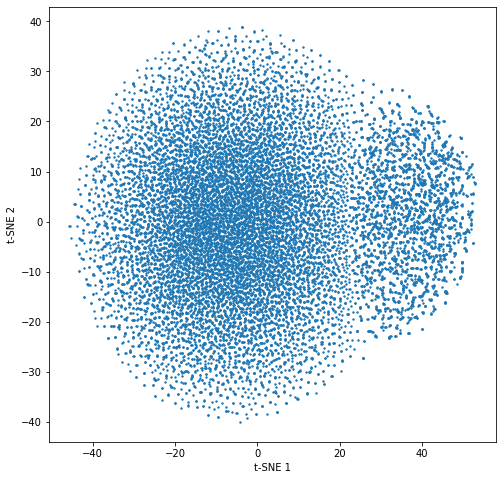

In [125]:
plt.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots()

ax.scatter(x = tsne_data[:,0], y = tsne_data[:,1], s = 2)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
#ax.set_title('PCA')
None

### t-SNE plot for selected words

In [234]:
tsne_data_sel = TSNE(n_components = 2, perplexity = 30, verbose = 1,
                init = 'pca').fit_transform(selected_result)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 101 samples in 0.000s...
[t-SNE] Computed neighbors for 101 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 101 / 101
[t-SNE] Mean sigma: 3.337786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.468807


/Users/iMotz/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


[t-SNE] KL divergence after 1000 iterations: 0.397990


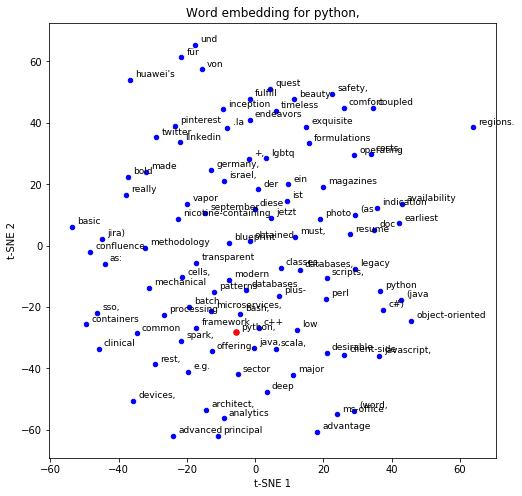

In [235]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = plt.subplots()

for i in range(0, len(my_search_words)):
    ax.scatter(tsne_data_sel[i,0], tsne_data_sel[i,1], marker='o', s = 20, color='blue')
    ax.text(tsne_data_sel[i,0]+1.5, tsne_data_sel[i,1]+1, my_search_words[i], fontsize = 9)
ax.scatter(tsne_data_sel[100,0], tsne_data_sel[100,1], marker='o', s = 30, color='red')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_title('Word embedding for %s' % search_word)
None